Caso 1

Caracterización de los datos

Los datos provienen de una base de datos de una empresa de seguros la cual cuenta con 5 variables o factores, estas son: Edad, Hijos (Número), Región, Índice de Masa Corpotal (BMI), Fumador (Sí ó No); y una variable dependiente, en este caso, el valor final del seguro según los factores o cargos.

In [5]:
import pandas as pd
df=pd.read_csv('insurance.csv')
df.head(3)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.90,0,yes,southwest,16884.9240
1,18,male,33.77,1,no,southeast,1725.5523
2,28,male,33.00,3,no,southeast,4449.4620


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [7]:
import csv
import statistics

ages = []
bmis = []
charges = []

with open('insurance.csv', 'r') as file:
    reader = csv.DictReader(file)
    for row in reader:
        ages.append(int(row['age']))
        bmis.append(float(row['bmi']))
        charges.append(float(row['charges']))


age_mean = statistics.mean(ages)
age_median = statistics.median(ages)
age_stddev = statistics.stdev(ages)
bmi_mean = statistics.mean(bmis)
bmi_median = statistics.median(bmis)
bmi_stddev = statistics.stdev(bmis)
charges_mean = statistics.mean(charges)
charges_median = statistics.median(charges)
charges_stddev = statistics.stdev(charges)


print("Estadísticas descriptivas para 'age':")
print(f"   Media: {age_mean}")
print(f"   Mediana: {age_median}")
print(f"   Desviación estándar: {age_stddev}")

print("\nEstadísticas descriptivas para 'bmi':")
print(f"   Media: {bmi_mean}")
print(f"   Mediana: {bmi_median}")
print(f"   Desviación estándar: {bmi_stddev}")

print("\nEstadísticas descriptivas para 'charges':")
print(f"   Media: {charges_mean}")
print(f"   Mediana: {charges_median}")
print(f"   Desviación estándar: {charges_stddev}")


Estadísticas descriptivas para 'age':
   Media: 39.20702541106129
   Mediana: 39.0
   Desviación estándar: 14.049960379216156

Estadísticas descriptivas para 'bmi':
   Media: 30.66339686098655
   Mediana: 30.4
   Desviación estándar: 6.098186911679014

Estadísticas descriptivas para 'charges':
   Media: 13270.422265141257
   Mediana: 9382.033
   Desviación estándar: 12110.011236694001


In [ ]:
pip install pandas

In [ ]:
pip install seaborn

In [ ]:
pip install matplotlib.pyplot

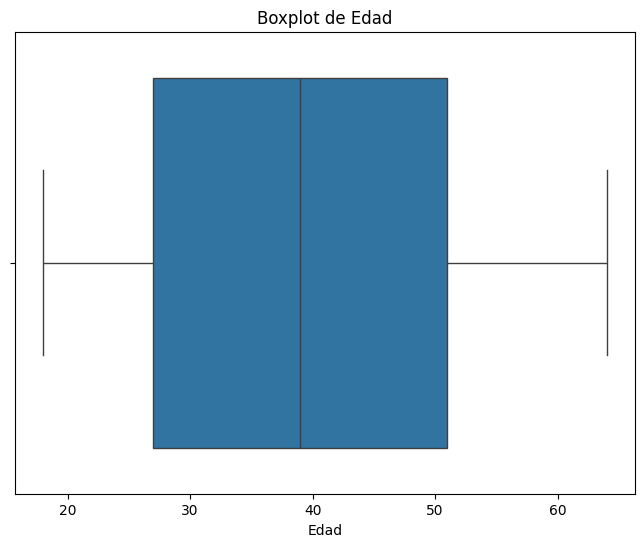

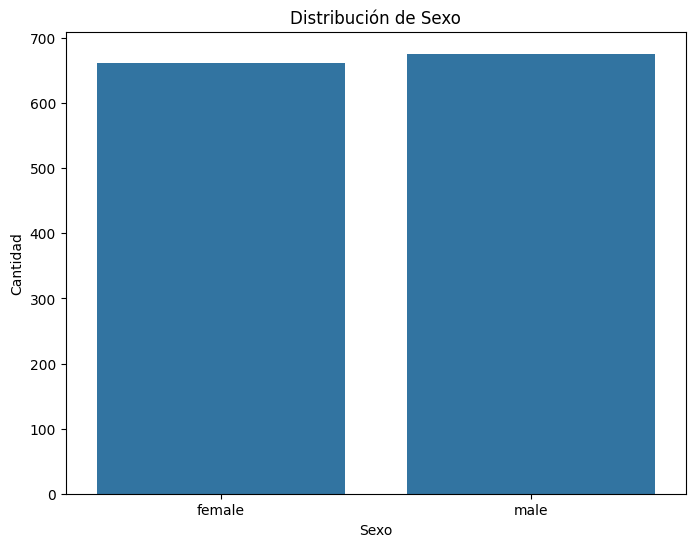

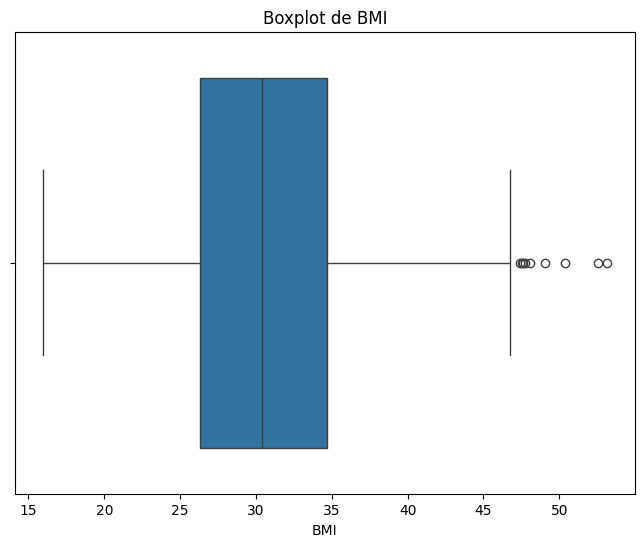

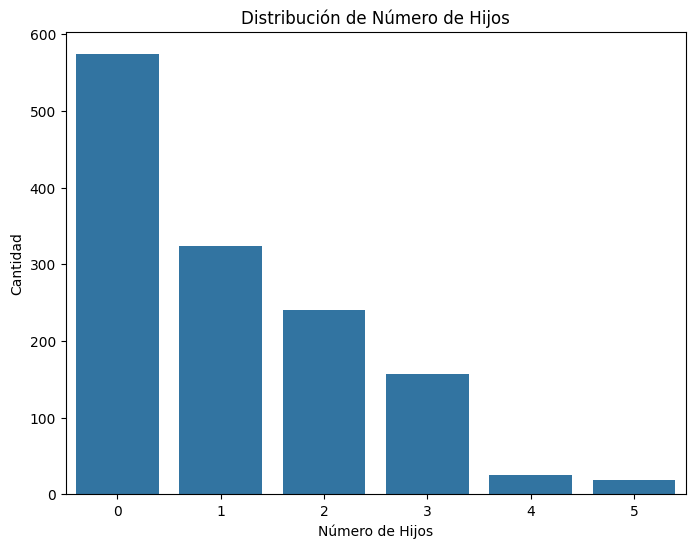

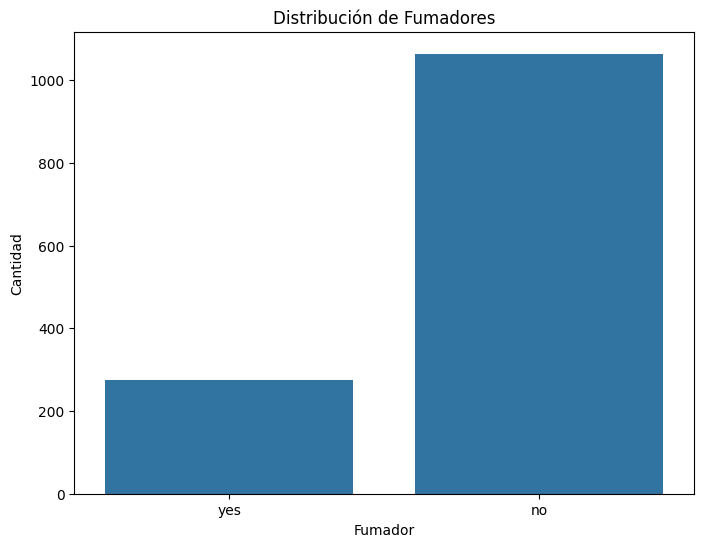

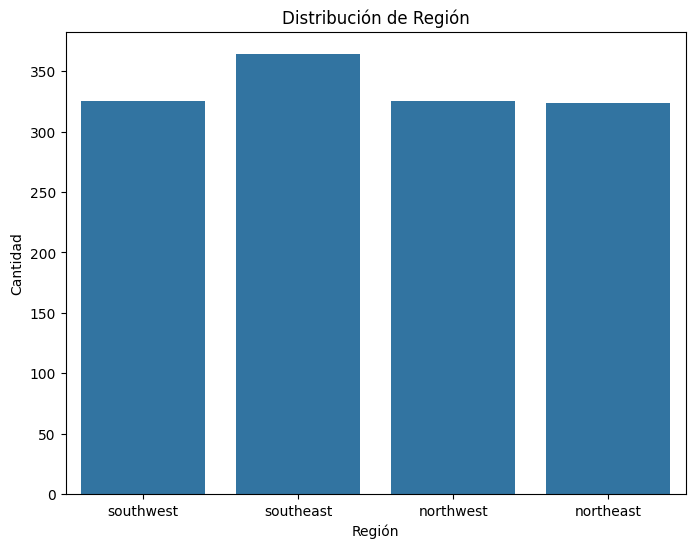

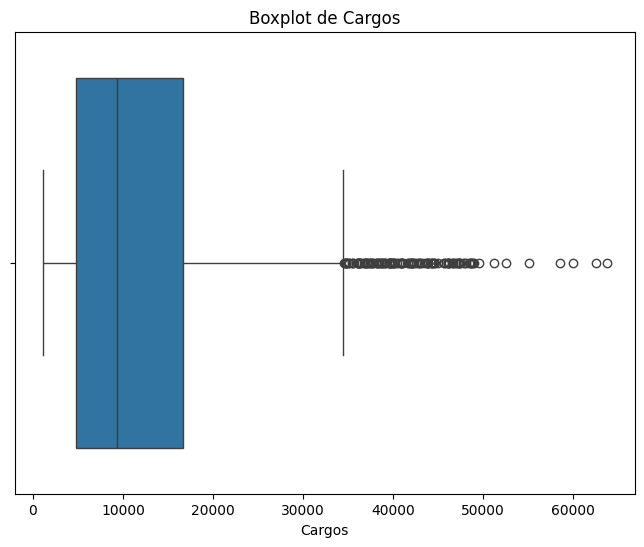

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance.csv')

plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df)
plt.title('Boxplot de Edad')
plt.xlabel('Edad')
plt.show()

# Gráfico de barras para sexo
plt.figure(figsize=(8, 6))
sns.countplot(x='sex', data=df)
plt.title('Distribución de Sexo')
plt.xlabel('Sexo')
plt.ylabel('Cantidad')
plt.show()

# Box plot para BMI
plt.figure(figsize=(8, 6))
sns.boxplot(x='bmi', data=df)
plt.title('Boxplot de BMI')
plt.xlabel('BMI')
plt.show()

# Gráfico de barras para número de hijos
plt.figure(figsize=(8, 6))
sns.countplot(x='children', data=df)
plt.title('Distribución de Número de Hijos')
plt.xlabel('Número de Hijos')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para fumadores
plt.figure(figsize=(8, 6))
sns.countplot(x='smoker', data=df)
plt.title('Distribución de Fumadores')
plt.xlabel('Fumador')
plt.ylabel('Cantidad')
plt.show()

# Gráfico de barras para región
plt.figure(figsize=(8, 6))
sns.countplot(x='region', data=df)
plt.title('Distribución de Región')
plt.xlabel('Región')
plt.ylabel('Cantidad')
plt.show()

# Box plot para cargos 
plt.figure(figsize=(8, 6))
sns.boxplot(x='charges', data=df)
plt.title('Boxplot de Cargos')
plt.xlabel('Cargos')
plt.show()


Gráfica 8

Cantidad de valores atípicos en la columna 'charges': 139


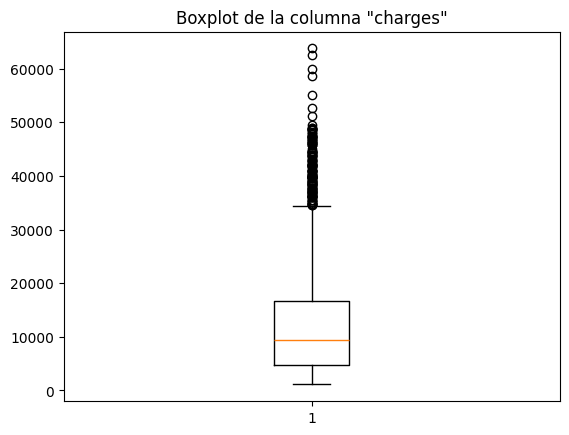

Filas que contienen valores atípicos en la columna 'bmi':
      age     sex     bmi  children smoker     region      charges
14     27    male  42.130         0    yes  southeast  39611.75770
19     30    male  35.300         0    yes  southwest  36837.46700
23     34  female  31.920         1    yes  northeast  37701.87680
29     31    male  36.300         2    yes  southwest  38711.00000
30     22    male  35.600         0    yes  southwest  35585.57600
...   ...     ...     ...       ...    ...        ...          ...
1300   45    male  30.360         0    yes  southeast  62592.87309
1301   62    male  30.875         3    yes  northwest  46718.16325
1303   43    male  27.800         0    yes  southwest  37829.72420
1313   19  female  34.700         2    yes  southwest  36397.57600
1323   42  female  40.370         2    yes  southeast  43896.37630

[139 rows x 7 columns]


In [32]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
datos = pd.read_csv('insurance.csv')

# Extraer la columna 'charges'
charges = datos['charges']

# Calcular el rango intercuartílico (IQR)
Q1 = charges.quantile(0.25)
Q3 = charges.quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites superior e inferior del rango intercuartílico
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (charges < limite_inferior) | (charges > limite_superior)

# Contar la cantidad de valores atípicos
cantidad_valores_atipicos = valores_atipicos.sum()

print("Cantidad de valores atípicos en la columna 'charges':", cantidad_valores_atipicos)

# Graficar el boxplot
plt.boxplot(charges)
plt.title('Boxplot de la columna "charges"')
plt.show()

filas_valores_atipicos = datos[valores_atipicos]

print("Filas que contienen valores atípicos en la columna 'bmi':")
print(filas_valores_atipicos)

Cantidad de valores atípicos en la columna 'bmi': 9


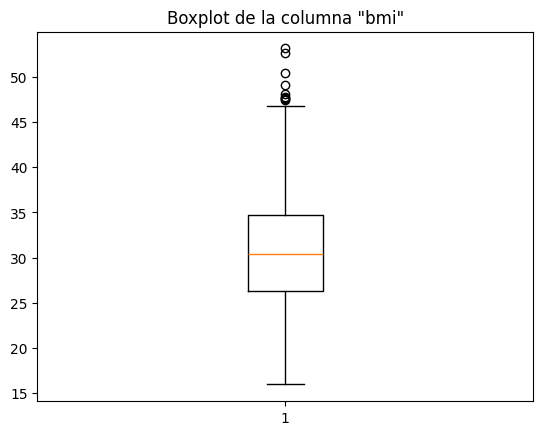

In [33]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
datos = pd.read_csv('insurance.csv')

# Extraer la columna 'bmi'
bmi = datos['bmi']

# Calcular el rango intercuartílico (IQR)
Q1 = bmi.quantile(0.25)
Q3 = bmi.quantile(0.75)
IQR = Q3 - Q1

# Calcular los límites superior e inferior del rango intercuartílico
limite_superior = Q3 + 1.5 * IQR
limite_inferior = Q1 - 1.5 * IQR

# Identificar los valores atípicos
valores_atipicos = (bmi < limite_inferior) | (bmi > limite_superior)

# Contar la cantidad de valores atípicos
cantidad_valores_atipicos = valores_atipicos.sum()

print("Cantidad de valores atípicos en la columna 'bmi':", cantidad_valores_atipicos)

# Graficar el boxplot
plt.boxplot(bmi)
plt.title('Boxplot de la columna "bmi"')
plt.show()

In [ ]:
pip install statistics

Modelo de Regresión

In [ ]:
pip install statsmodels

In [36]:
import pandas as pd

df = pd.read_csv('insurance.csv')

numeric_df = df.select_dtypes(include=['int64', 'float64'])

correlation_matrix = numeric_df.corr()
print("Matriz de correlación:")
print(correlation_matrix)


Matriz de correlación:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


In [3]:
import pandas as pd
import statsmodels.api as sm

df = pd.read_csv('insurance.csv')

df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})
X = df[['age', 'bmi', 'children', 'smoker']]  # Variables independientes
y = df['charges']  # Variable dependiente

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     998.1
Date:                Sun, 03 Mar 2024   Prob (F-statistic):               0.00
Time:                        20:07:03   Log-Likelihood:                -13551.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1333   BIC:                         2.714e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -1.21e+04    941.984    -12.848      0.0

SELECCIÓN DE VARIABLES A TENER EN CUENTA PARA LA REGRESION:

Todas las variables se tendrán en cuenta para la regresión, esto en primer lugar porque todas son significativas y además, todas suman o aportan de manera positiva al cargo final, esto según el coeficiente; es importante tener en cuenta que el 'const' es negativo, por lo que se asume que si no se tienen en cuenta ninguno de los factores se está perdiendo dinero, algo con sentido dado que los datos provienen de una empresa de seguros y este tipo de mercado debe tener muchos factores en cuenta para así poder cobrar más y generar rentabilidad.



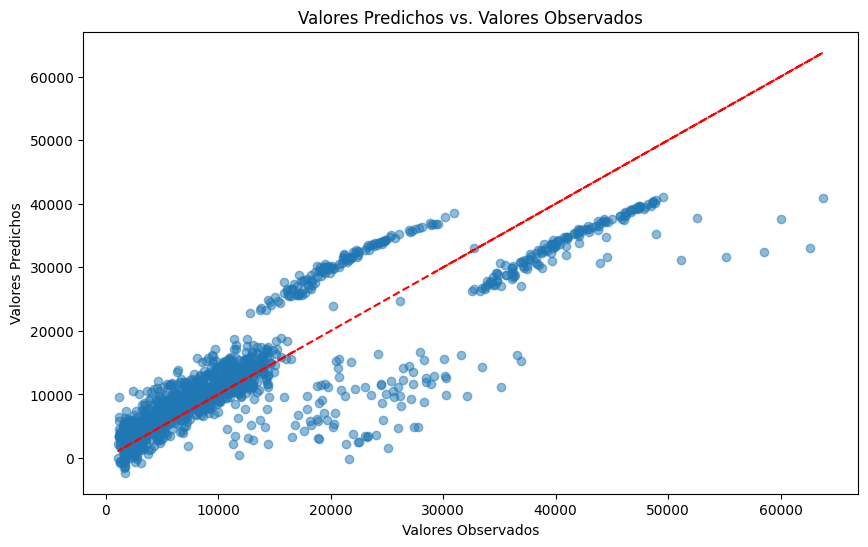

In [4]:
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt

df = pd.read_csv('insurance.csv')

df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

X = df[['age', 'bmi', 'children', 'smoker']]  # Variables independientes
y = df['charges']  # Variable dependiente

X = sm.add_constant(X)

modelo = sm.OLS(y, X).fit()

y_pred = modelo.predict(X)

plt.figure(figsize=(10, 6))
plt.scatter(y, y_pred, alpha=0.5)
plt.plot(y, y, color='red', linestyle='--')  # Línea de identidad
plt.title('Valores Predichos vs. Valores Observados')
plt.xlabel('Valores Observados')
plt.ylabel('Valores Predichos')
plt.show()


¿EL MODELO TIENE PROBLEMAS?

El modelo es bastante bueno de por sí, esto nos lo indica el R2 ajustado, es importante tomar en cuenta el ajustado ya que se están usando 4 factores, siendo el valor de este de 0,749, un valor que está bien ya que nos dice que alrededor del 75% de los datos de Y se pueden explicar en términos de X. Sin embargo, es bastante notable la presencia de datos atípicos dentro de la gráfica que se encuentran localizados de forma inusual con respecto a la regresión, no obstante, es importante tener presente la empresa y el mercado al que se hace referencia, de modo que es altamente posible que existan datos en la variable Y o 'cargos' que puedan ir desde 5000 (para un joven con 0 hijos, que no sea fumador y un BMI bueno) hasta 60000 (para un adulto de 62 años, fumador, que tiene hijos y un mal BMI), por lo tanto, pese a que cuente con 139 datos atípicos de 1340 en total (gráfica 8), es bastante común y posible según el contexto de los datos.

Por el momento, no se encuentra mejor modelo posible, esto dado que los factores individualmente no cuentan con datos atípicos mayores a 10 (últimos gráficos), por lo que se decidió que no es significativo eliminar tales datos en pro de 'mejorar' el modelo.

¿QUÉ DECISIONES SE PUEDEN TOMAR?

1. Prima del seguro: Los datos arrojan que tanto aumenta un seguro en función de su variable de estudio, por ejemplo, la variable que más aporta al aumento del costo final del seguro es la de fumadores, por lo que se puede considerar reajustar el aumento de precios según los factores, y de esta forma considerar aumentar precios (de manera proporcionada) a aquellos factores que aumentan de baja forma los costos finales, como puede ser la edad, ya que esta varía desde menos de 20 años hasta más de 60.

2. Segmentación: Conociendo de antemano aquellos factores que más inciden en la tarifa del seguro, se puede optar por enfocarse en aquel grupo de personas que pertenecen precisamente a esa variable, como la de fumadores activos y con hijos, de esta forma podrían conseguir aumentar los ingresos dado que venden más tarifas con un valor más alto.

3. Integrar más factores: La empresa puede repensar los factores a tomar en cuenta para el precio final del seguro y agregar más variables, estas podrían ser si padecen de alguna patología, adicción o si cuentan con antecedentes familiares no benignos, de esta forma no solo pueden lograr aumentar ingresos, sino que les brinda un análisis más profundo de sus clientes y así conocer la viabilidad de brindar un seguro o no de acuerdo a los antecedentes.

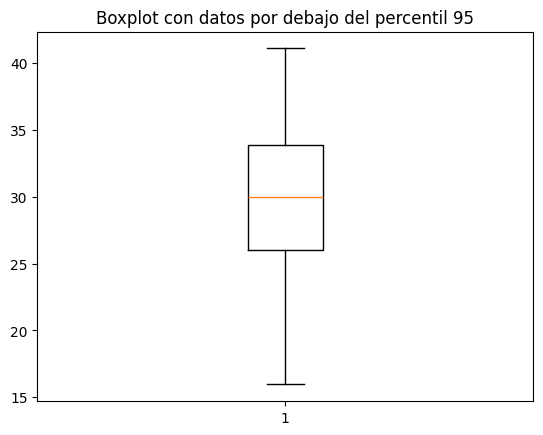

In [5]:
import pandas as pd
import matplotlib.pyplot as plt

# Cargar los datos desde el archivo CSV
datos = pd.read_csv('insurance.csv')

# Calcular el percentil 95
percentil_95 = datos['bmi'].quantile(0.95)

# Filtrar los datos para mantener solo aquellos por debajo del percentil 95
datos_filtrados = datos[datos['bmi'] <= percentil_95]

# Graficar el boxplot con los datos filtrados
plt.boxplot(datos_filtrados['bmi'])
plt.title('Boxplot con datos por debajo del percentil 95')
plt.show()

In [6]:
import pandas as pd

# Cargar los datos desde el archivo CSV
datos = pd.read_csv('insurance.csv')

# Calcular el percentil 95
percentil_95 = datos['bmi'].quantile(0.95)

# Filtrar los datos para mantener solo aquellos por debajo del percentil 95
datos_filtrados = datos[datos['bmi'] <= percentil_95]

# Calcular cuántos datos se mantuvieron y cuántos se eliminaron
datos_mantuvieron = len(datos_filtrados)
datos_eliminados = len(datos) - datos_mantuvieron

print("Datos mantenidos:", datos_mantuvieron)
print("Datos eliminados:", datos_eliminados)

Datos mantenidos: 1271
Datos eliminados: 67


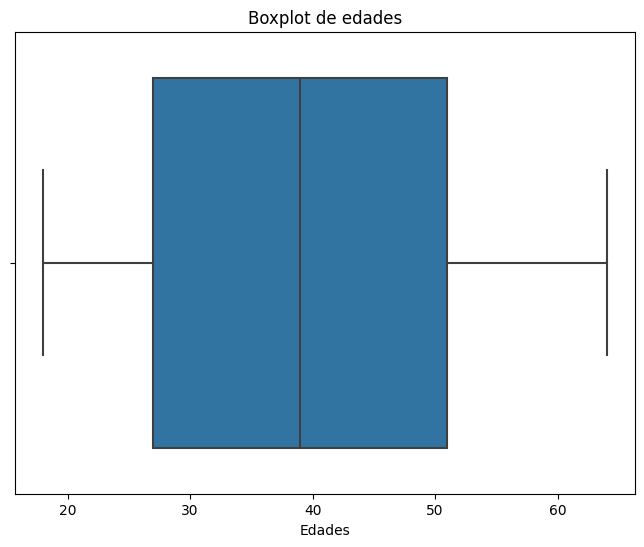

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('insurance.csv')
plt.figure(figsize=(8, 6))
sns.boxplot(x='age', data=df)
plt.title('Boxplot de edades')
plt.xlabel('Edades')
plt.show()

In [2]:
pip install numpy

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


Regresión con los factores categóricos

In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm

# Cargar datos
df = pd.read_csv('insurance.csv')

# Convertir 'smoker' a variable binaria (1 para 'yes', 0 para 'no')
df['smoker'] = df['smoker'].map({'yes': 1, 'no': 0})

# Convertir las variables categóricas 'sex' y 'region' en variables dummy
df = pd.get_dummies(df, columns=['sex', 'region'], drop_first=True)

# Agregar las columnas 'sex_female' y 'region_northeast'
df['sex_female'] = 1 - df['sex_male']  # 1 if female, 0 otherwise
df['region_northeast'] = 1 - df['region_northwest'] - df['region_southeast'] - df['region_southwest']  # 1 if northeast, 0 otherwise

# Seleccionar variables independientes y dependiente
X = df[['age', 'bmi', 'children', 'smoker', 'sex_female', 'region_northeast', 'region_northwest', 'region_southeast', 'region_southwest']]
y = df['charges']

# Convertir los datos a arrays de NumPy
X = X.to_numpy()
y = y.to_numpy()

# Asegurarse de que todas las variables en X son de tipo numérico
X = X.astype(float)

# Agregar una constante a la matriz de características (para ajustar el intercepto)
X = sm.add_constant(X)

# Ajustar el modelo de regresión lineal usando OLS (Mínimos cuadrados ordinarios)
modelo = sm.OLS(y, X).fit()

# Imprimir el resumen del modelo
print(modelo.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.749
Method:                 Least Squares   F-statistic:                     500.8
Date:                Tue, 05 Mar 2024   Prob (F-statistic):               0.00
Time:                        22:43:53   Log-Likelihood:                -13548.
No. Observations:                1338   AIC:                         2.711e+04
Df Residuals:                    1329   BIC:                         2.716e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.013e+04    791.569    -12.792      0.0

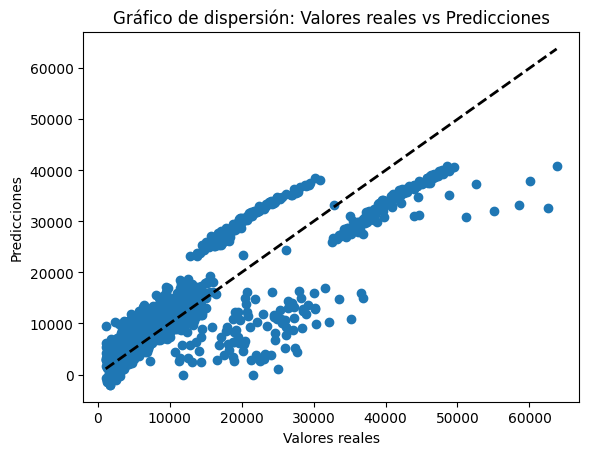

In [14]:
import matplotlib.pyplot as plt

# Predicciones del modelo
predicciones = modelo.predict(X)

# Gráfico de dispersión de los datos reales
plt.scatter(y, predicciones)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)  # Línea de tendencia
plt.xlabel('Valores reales')
plt.ylabel('Predicciones')
plt.title('Gráfico de dispersión: Valores reales vs Predicciones')
plt.show()



Análisis complementario 

El R² es 0.751, lo que significa que aproximadamente el 75.1% de la variabilidad en la variable dependiente (cargos médicos) es explicada por las variables independientes incluidas en el modelo. En cuanto a los coeficientes de regresión estimados se puede observar que para la variable 'age' (x1), el coeficiente es 256.8564, lo que significa que por cada año adicional de edad, los cargos médicos aumentan en promedio $256.86. También se observa que las variables 'age', 'bmi', 'children', 'smoker', 'region_northeast', 'region_southeast', 'region_southwest' tienen valores p-value muy pequeños, lo que sugiere que son estadísticamente significativas.

Los coeficientes negativos asociados a las variables de la región indican que, en comparación con la región de referencia (probablemente la región noreste), las otras regiones tienen un efecto negativo en el costo de los seguros médicos. Esto significa que, después de controlar otras variables en el modelo, los individuos que residen en regiones diferentes a la región de referencia tienden a tener costos de seguros médicos más bajos.

Sin embargo, es importante tener en cuenta que estos coeficientes negativos no necesariamente indican una relación causal directa entre la región y el costo del seguro médico. Pueden haber otros factores no incluidos en el modelo que están correlacionados tanto con la región como con el costo del seguro médico.

Referencia de la Base de Datos

Choi, M. (2018). Medical Cost Personal Datasets [Data set]. Kaggle. https://www.kaggle.com/datasets/mirichoi0218/insurance

Caso 2

C:\Users\danie\AppData\Local\Temp\ipykernel_16244\2134035691.py:62: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


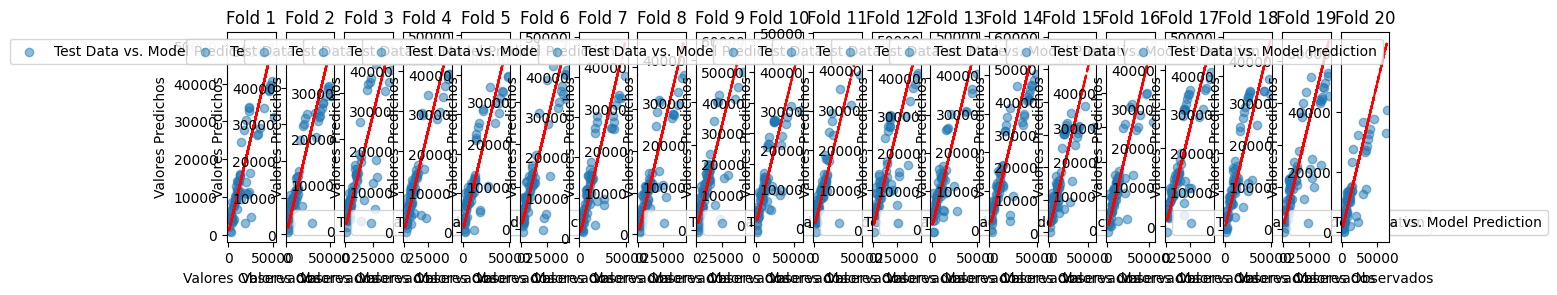

MSE promedio para K-Fold CV: 36701485.92775258
MSE de cada pliegue: [42825300.87489888, 24896218.008981213, 36620476.65985733, 23795523.58734586, 32413275.13657207, 39799290.2975961, 33507201.87889551, 25705128.213099677, 27755253.62825355, 56004661.86105529, 12107843.898862345, 51992383.0386029, 29785834.6212284, 36711322.513443984, 45947877.50111021, 35498841.958451286, 39284827.338758886, 37837430.96826016, 45280168.623936296, 56260857.94584152]


In [14]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Método 1: K-Fold Cross-Validation
k = 20  # Número de pliegues
kf = KFold(n_splits=k, shuffle=True, random_state=0)

# Lista para almacenar los MSE de cada pliegue
mse_scores = []

# Crear una figura para K-Fold
plt.figure(figsize=(15, 6))

fold = 1
for train_idx, test_idx in kf.split(X):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Ajustar el modelo en el conjunto de entrenamiento
    modelo_fitted = modelo.fit()

    # Predecir sobre el conjunto de prueba
    y_pred = modelo_fitted.predict(X_test)

    # Calcular el Error Cuadrático Medio (MSE) para este pliegue
    mse = np.mean((y_test - y_pred) ** 2)
    mse_scores.append(mse)

    # Visualizar el ajuste del modelo para cada pliegue
    plt.subplot(2, k, fold)
    plt.scatter(y_test, y_pred, label='Test Data vs. Model Prediction', alpha=0.5)
    plt.plot(y_test, y_test, color='red', linestyle='--')  # Línea de identidad
    plt.title(f'Fold {fold}')
    plt.xlabel('Valores Observados')
    plt.ylabel('Valores Predichos')
    plt.legend()
    fold += 1

# Calcular el MSE promedio
mean_mse = np.mean(mse_scores)

# Ajustar los espacios entre las gráficas para que se vean mejor
plt.tight_layout()

# Mostrar los resultados
plt.show()

# Mostrar el MSE promedio
print(f"MSE promedio para K-Fold CV: {mean_mse}")
print("MSE de cada pliegue:", mse_scores)

#k=3, 36680455.99149378
#K=5, 36686587.6234814
#k=10,36692305.93968387
#k=15,36691072.50789375
#k=20,36701485.92775258

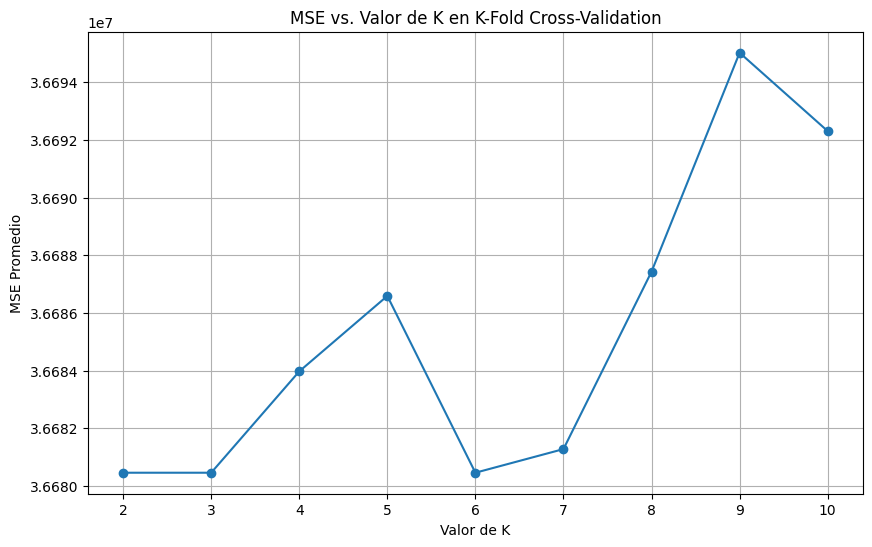

In [15]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold

# Cargar los datos
df = pd.read_csv('insurance.csv')

# Mapear la variable 'smoker' a valores numéricos
df['smoker'] = df['smoker'].map({'no': 0, 'yes': 1})

# Definir variables independientes (X) y dependiente (y)
X = df[['age', 'bmi', 'children', 'smoker']]
y = df['charges']

# Añadir la columna de constante a X para el término independiente
X = sm.add_constant(X)

# Inicializar el modelo de regresión lineal
modelo = sm.OLS(y, X)

# Definir una lista para almacenar los MSE de cada iteración
mse_values = []

# Definir una lista para almacenar los valores de K
k_values = range(2, 11)  # Rango de valores de K que quieres probar

# Realizar la validación cruzada para diferentes valores de K
for k in k_values:
    # Inicializar K-Fold Cross-Validation
    kf = KFold(n_splits=k, shuffle=True, random_state=0)
    
    # Lista para almacenar los MSE de cada pliegue
    mse_scores = []
    
    # Realizar la validación cruzada
    for train_idx, test_idx in kf.split(X):
        X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        # Ajustar el modelo en el conjunto de entrenamiento
        modelo_fitted = modelo.fit()

        # Predecir sobre el conjunto de prueba
        y_pred = modelo_fitted.predict(X_test)

        # Calcular el Error Cuadrático Medio (MSE) para este pliegue
        mse = np.mean((y_test - y_pred) ** 2)
        mse_scores.append(mse)
    
    # Calcular el MSE promedio para este valor de K
    mean_mse = np.mean(mse_scores)
    
    # Almacenar el MSE promedio en la lista de valores de MSE
    mse_values.append(mean_mse)

# Graficar los valores de MSE en función de los valores de K
plt.figure(figsize=(10, 6))
plt.plot(k_values, mse_values, marker='o', linestyle='-')
plt.title('MSE vs. Valor de K en K-Fold Cross-Validation')
plt.xlabel('Valor de K')
plt.ylabel('MSE Promedio')
plt.xticks(k_values)
plt.grid(True)
plt.show()